In [25]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
import matplotlib.pyplot as plt
sns.set(style='white',color_codes=True)

diab =pd.read_csv('diabetes.csv')
%matplotlib inline

diab.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


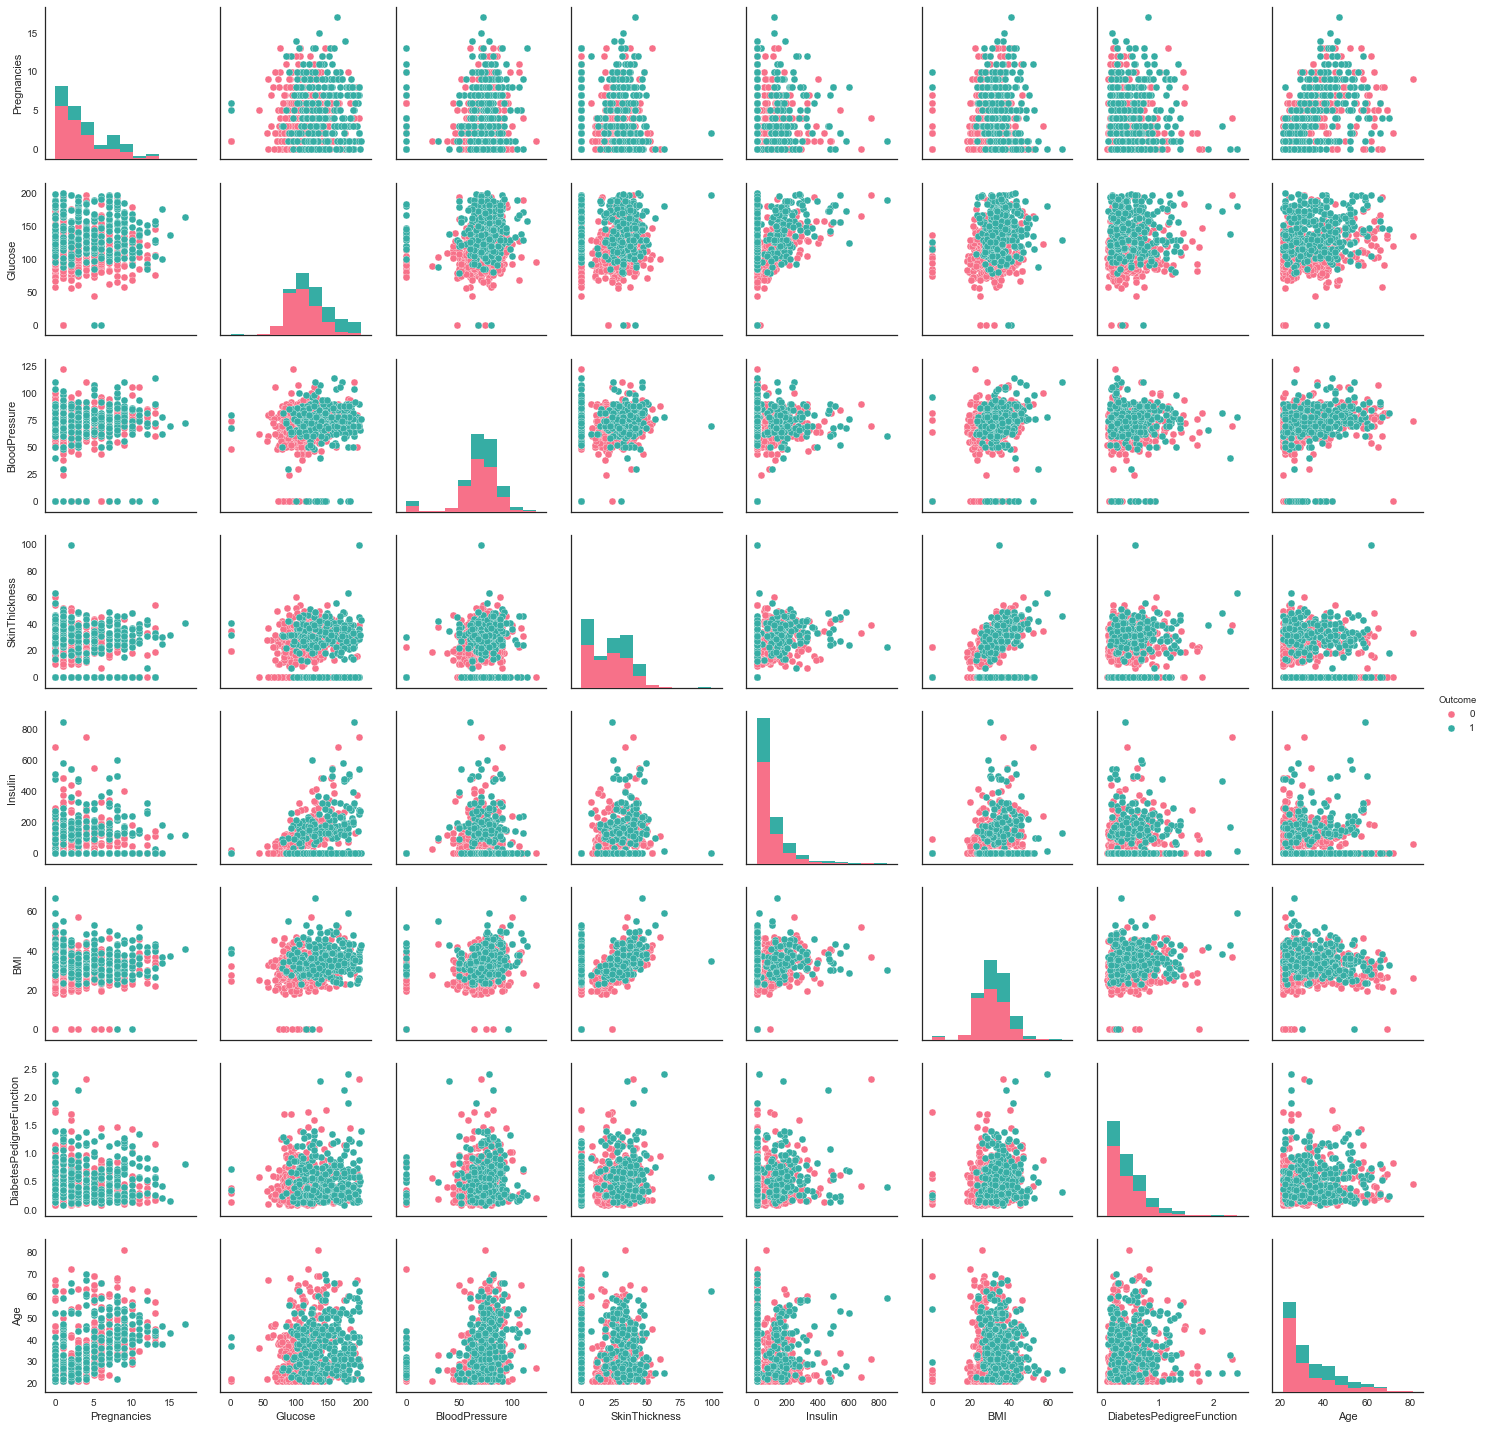

In [26]:
sns.pairplot(diab,hue='Outcome',palette ='husl',vars =['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age'])

C:\Users\Abhishek\AppData\Local\Continuum\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


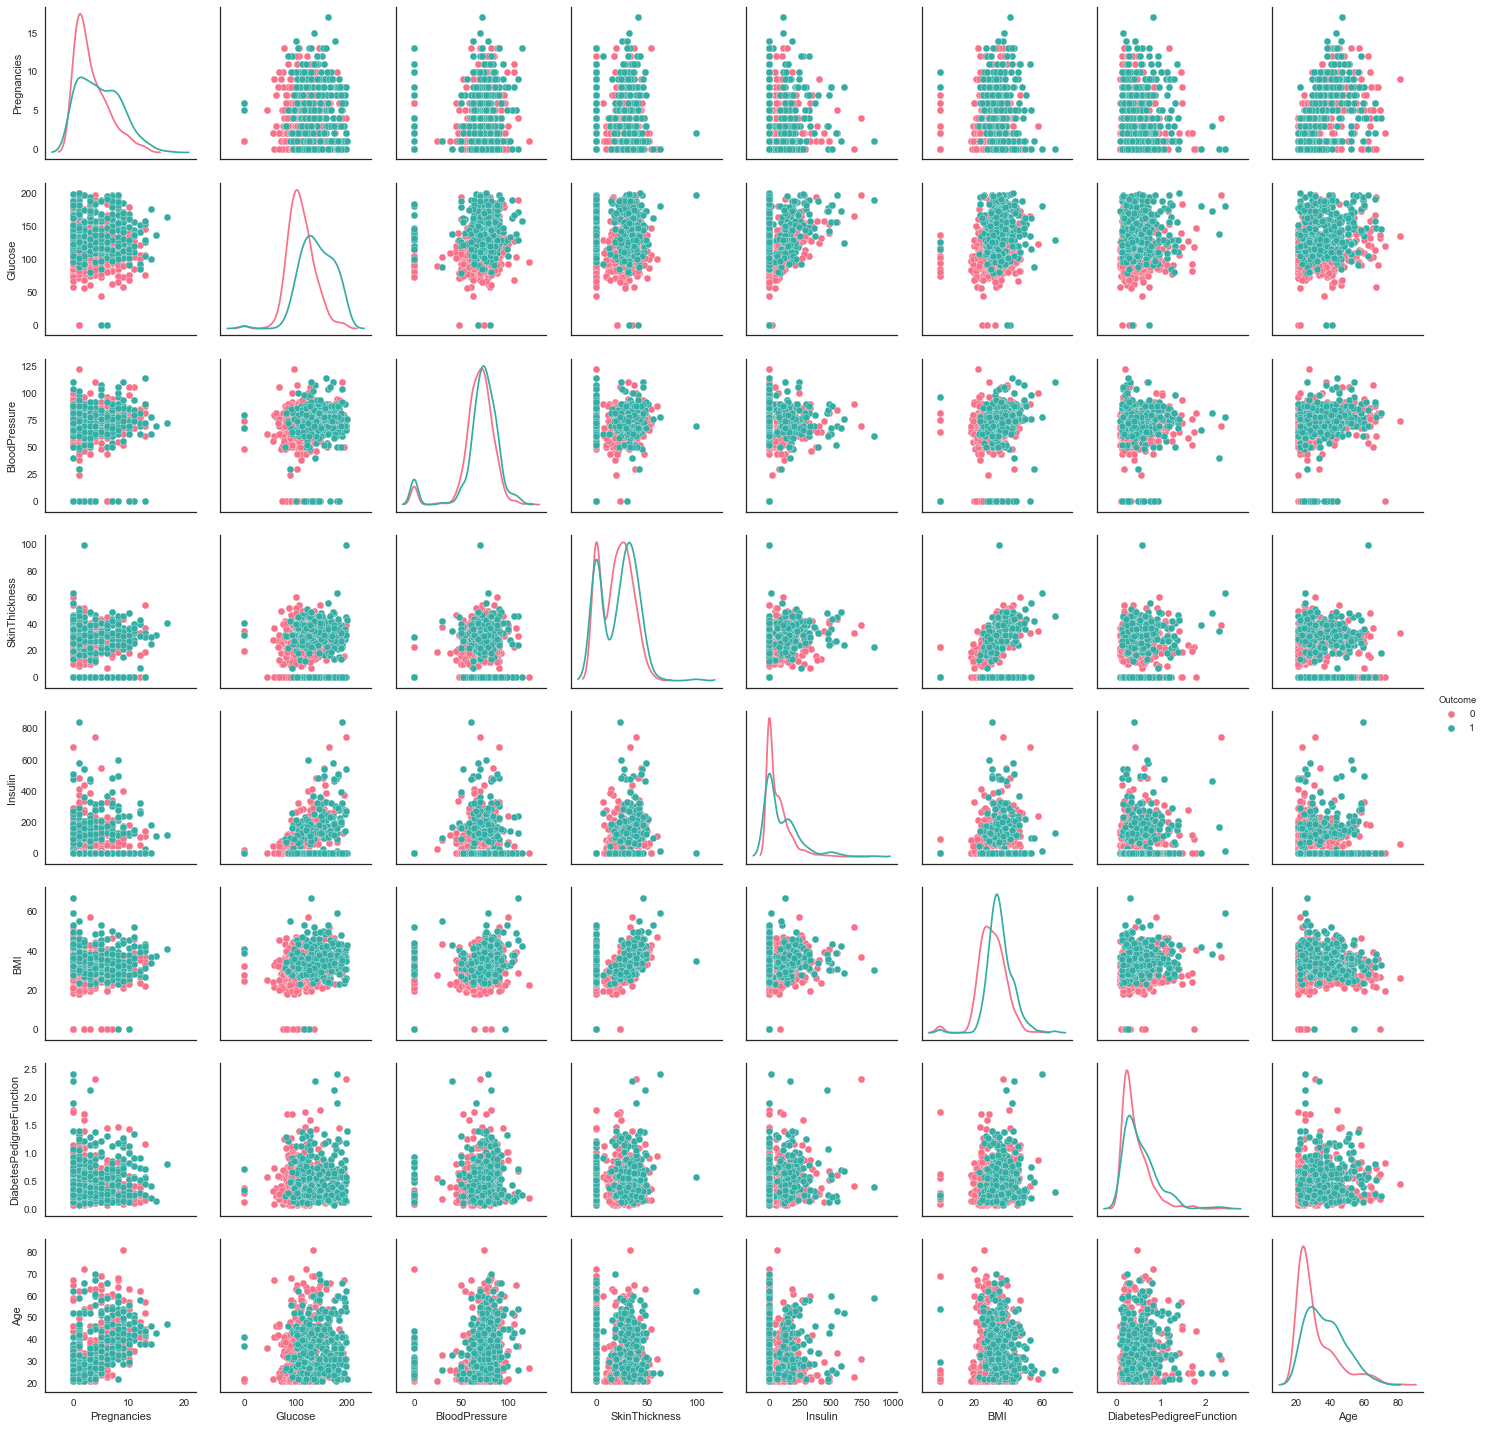

In [27]:
sns.pairplot(diab,hue='Outcome',palette ='husl',vars =['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age'],diag_kind ='kde')

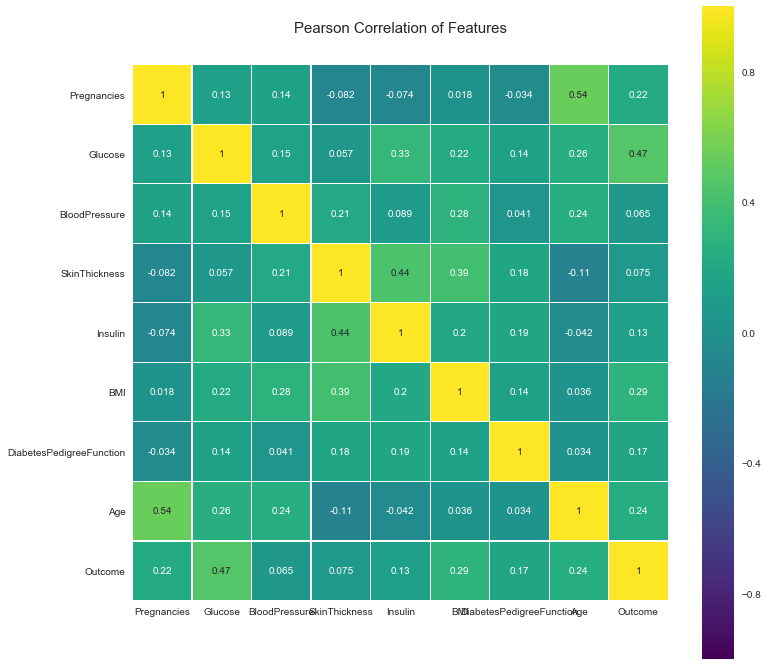

In [28]:
colormap = plt.cm.viridis
plt.figure(figsize=(12,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(diab.astype(float).corr(),linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)

In [29]:
Y = diab.Outcome.values

#drop the outcomes from the diab dataframe and create a matrix out of diab data

diab = diab.drop('Outcome',axis=1)
X=diab.as_matrix()

colnames = diab.columns

In [30]:
from sklearn.feature_selection import RFE, f_regression
from sklearn.linear_model import (LinearRegression, Ridge, Lasso, RandomizedLasso)
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor

In [31]:
# Define dictionary to store our rankings
ranks = {}
# Create our function which stores the feature rankings to the ranks dictionary
def ranking(ranks, names, order=1):
    minmax = MinMaxScaler()
    ranks = minmax.fit_transform(order*np.array([ranks]).T).T[0]
    ranks = map(lambda x: round(x,2), ranks)
    return dict(zip(names, ranks))

In [32]:
# Finally let's run our Selection Stability method with Randomized Lasso
rlasso = RandomizedLasso(alpha=0.04)
rlasso.fit(X, Y)
ranks["rlasso/Stability"] = ranking(np.abs(rlasso.scores_), colnames)
print('finished')

finished


C:\Users\Abhishek\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\randomized_l1.py:53: DeprecationWarning: This function is deprecated. Please call randint(0, 1 + 1) instead
  for _ in range(n_resampling)):
C:\Users\Abhishek\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\randomized_l1.py:53: DeprecationWarning: This function is deprecated. Please call randint(0, 1 + 1) instead
  for _ in range(n_resampling)):
C:\Users\Abhishek\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\randomized_l1.py:53: DeprecationWarning: This function is deprecated. Please call randint(0, 1 + 1) instead
  for _ in range(n_resampling)):
C:\Users\Abhishek\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\randomized_l1.py:53: DeprecationWarning: This function is deprecated. Please call randint(0, 1 + 1) instead
  for _ in range(n_resampling)):
C:\Users\Abhishek\AppData\Local\Continuum\Anaconda3\lib\site-packages\sk

In [33]:
#construct our linear regression model
lr = LinearRegression(normalize =True)
lr.fit(X,Y)
#stop the search when only the last features is left
rfe = RFE(lr, n_features_to_select=1, verbose =3 )
rfe.fit(X,Y)
ranks["RFE"] = ranking(list(map(float, rfe.ranking_)), colnames, order=-1)

Fitting estimator with 8 features.
Fitting estimator with 7 features.
Fitting estimator with 6 features.
Fitting estimator with 5 features.
Fitting estimator with 4 features.
Fitting estimator with 3 features.
Fitting estimator with 2 features.


In [34]:
# Using Linear Regression
lr = LinearRegression(normalize=True)
lr.fit(X,Y)
ranks["LinReg"] = ranking(np.abs(lr.coef_), colnames)

# Using Ridge 
ridge = Ridge(alpha = 7)
ridge.fit(X,Y)
ranks['Ridge'] = ranking(np.abs(ridge.coef_), colnames)

# Using Lasso
lasso = Lasso(alpha=.05)
lasso.fit(X, Y)
ranks["Lasso"] = ranking(np.abs(lasso.coef_), colnames)

In [35]:
rf = RandomForestRegressor(n_jobs=-1, n_estimators=50, verbose=3)
rf.fit(X,Y)
ranks["RF"] = ranking(rf.feature_importances_, colnames)

building tree 1 of 50building tree 2 of 50
building tree 3 of 50
building tree 4 of 50

building tree 5 of 50
building tree 6 of 50
building tree 7 of 50
building tree 8 of 50
building tree 9 of 50
building tree 10 of 50
building tree 11 of 50
building tree 12 of 50
building tree 13 of 50
building tree 14 of 50
building tree 15 of 50
building tree 16 of 50
building tree 17 of 50
building tree 18 of 50
building tree 19 of 50
building tree 20 of 50
building tree 21 of 50
building tree 22 of 50
building tree 23 of 50
building tree 24 of 50
building tree 25 of 50
building tree 26 of 50
building tree 27 of 50
building tree 28 of 50
building tree 29 of 50
building tree 30 of 50
building tree 31 of 50
building tree 32 of 50
building tree 33 of 50
building tree 34 of 50
building tree 35 of 50
building tree 36 of 50
building tree 37 of 50
building tree 38 of 50
building tree 39 of 50
building tree 40 of 50
building tree 41 of 50
building tree 42 of 50
building tree 43 of 50
building tree 44 of 

[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.0s finished


In [36]:
# Create empty dictionary to store the mean value calculated from all the scores
r = {}
for name in colnames:
    r[name] = round(np.mean([ranks[method][name] 
                             for method in ranks.keys()]), 2)
 
methods = sorted(ranks.keys())
ranks["Mean"] = r
methods.append("Mean")
 
print("\t%s" % "\t".join(methods))
for name in colnames:
    print("%s\t%s" % (name, "\t".join(map(str, 
                         [ranks[method][name] for method in methods]))))

	Lasso	LinReg	RF	RFE	Ridge	rlasso/Stability	Mean
Pregnancies	1.0	0.14	0.07	0.86	0.15	0.0	0.37
Glucose	0.42	0.04	1.0	0.57	0.04	0.0	0.34
BloodPressure	0.14	0.01	0.16	0.29	0.02	0.0	0.1
SkinThickness	0.02	0.0	0.02	0.0	0.0	0.0	0.01
Insulin	0.01	0.0	0.0	0.14	0.0	0.0	0.03
BMI	0.89	0.09	0.39	0.71	0.1	0.0	0.36
DiabetesPedigreeFunction	0.0	1.0	0.3	1.0	1.0	0.0	0.55
Age	0.22	0.02	0.26	0.43	0.02	0.0	0.16


In [37]:
# Put the mean scores into a Pandas dataframe
meanplot = pd.DataFrame(list(r.items()), columns= ['Feature','Mean Ranking'])

# Sort the dataframe
meanplot = meanplot.sort('Mean Ranking', ascending=False)

C:\Users\Abhishek\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


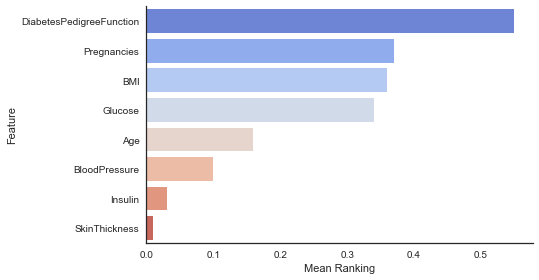

In [38]:
# Let's plot the ranking of the features
sns.factorplot(x="Mean Ranking", y="Feature", data = meanplot, kind="bar", size=4, aspect=1.9, palette='coolwarm')